# Final Project
## Assignment Instructions

Create a multivariate prediction model and perform data analyis of a dataset you choose. This can be either a linear regression, or a classification. 
This includes:

* 1 point - All code blocks run without error. 
* 2 points - Create 2 charts exploring the data with respect to the prediction variable (label)
* 2 points - Create a hypothesis and perform a t.test to reject or fail to reject that hypothesis
* 1 point - Split the data into training set and testing set for each model and wrangle the data as desired
* 3 points - Create 2 prediction models of your chosen type (regression | classification), with at least one multivariate model  including visualizing the results of each model
* 2 points - Compare the performance of your models
* 1 point - Include a written analysis of your prediction referencing using data to support your conclusions.

The above is what is required to achieve full credit for the assignment. You are welcome and encouraged to go above and beyond these requirements, just be sure these requirements are fully met first. 

## R Features
* You are welcome to use any feature covered in this class
* You are welcome to load any library that is already installed in the virtual environment, but you cannot install new packages. You can also reference installed packages by library name::function_name to avoid naming conflicts
* Use set.seed() as necessary to ensure reproducability as the instructor / TA will run the code to grade it
* Ensure your code runs to completion within 60 minutes from start to finish. You may save and load pre-trained models with your instructor's prior permission if you feel you need to exceed this time limit.

## Dataset
* Your choice. Be sure the data lends itself to supervised learning, with a label and is appropriate for either regression or classification. Remove any personally identifiable data. 
* Suggested data source [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/datasets.html) and look for Data Types == Multivariate and Default Task in (Classification, Regression)
* The data would need to be uploaded to the virtual environment such that the instructor or TA can run the code without error. 

In [1]:
# Load libraries
# Load any additional libraries. No install.package()
library(lubridate)
library(tidyverse)
library(readxl)

# set.seed for reproducible results
set.seed(1222) 


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


# Load and explore data structure

In [2]:
df_housing <- read_csv("kc_house_data.csv", col_names = TRUE)

df_housing %>% glimpse()

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875",…
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015-0…
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 257500…
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4, 2…
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00, 2…
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 18…
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7470…
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, …
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0…
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4…
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7, …
$ sqft_above    <

# Data processing
Create a new data frame(s) with appropriate data types and data cleaning for the data.

In [3]:
df_housing_large <- df_housing %>% filter(sqft_living >=2000) %>% drop_na()
df_housing_small <- df_housing %>% filter(sqft_living <2000) %>% drop_na()


df_housing %>% distinct(log(bathrooms), bathrooms) %>% filter(bathrooms != 0) 



log(bathrooms),bathrooms
<dbl>,<dbl>
0.0000000,1.00
0.8109302,2.25
1.0986123,3.00
0.6931472,2.00
1.5040774,4.50
0.4054651,1.50
0.9162907,2.50
0.5596158,1.75
1.0116009,2.75


# Explore prediction variable

## Chart 1

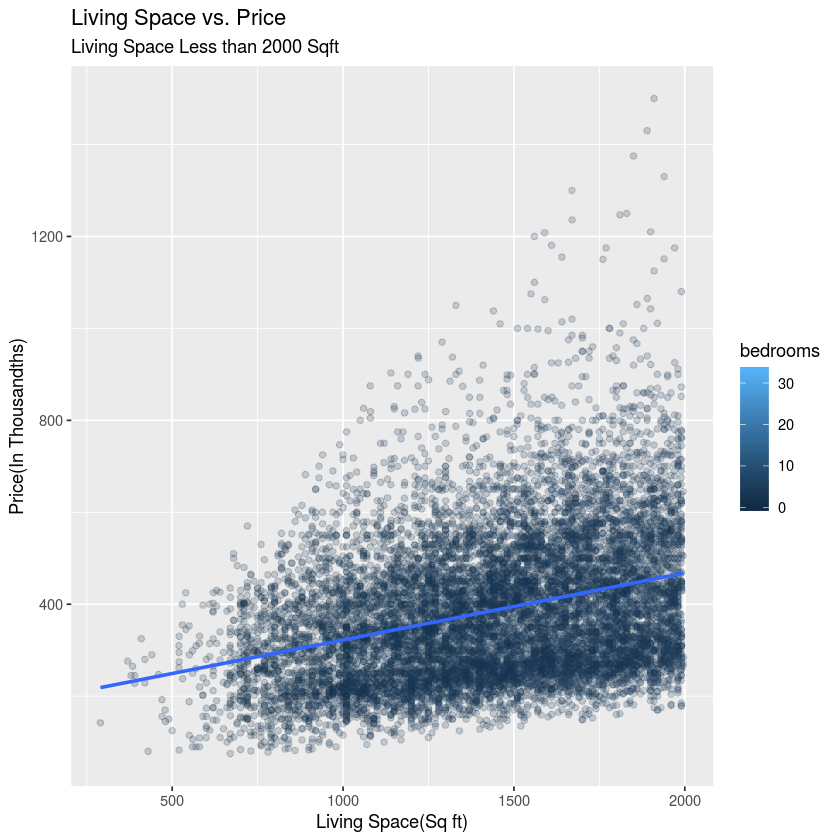

In [4]:
df_housing_small %>% ggplot(aes(x = sqft_living, y=price/1000, color = bedrooms))+
geom_jitter(alpha = .2) + geom_smooth(method = "lm", se = FALSE) +
labs(x = "Living Space(Sq ft)", y = "Price(In Thousandths)", title = "Living Space vs. Price",
     subtitle = "Living Space Less than 2000 Sqft")

## Chart 2

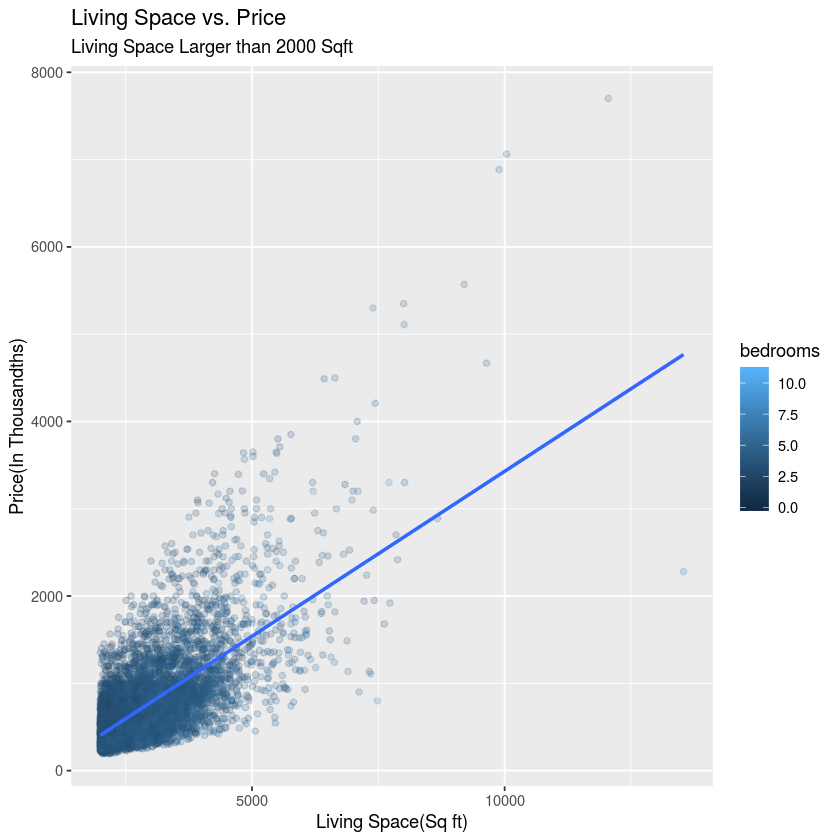

In [5]:
df_housing_large %>% ggplot(aes(x = sqft_living, y=price/1000, color = bedrooms))+
geom_jitter(alpha = .2) + geom_smooth(method = "lm", se = FALSE) + 
labs(x = "Living Space(Sq ft)", y = "Price(In Thousandths)", title = "Living Space vs. Price",
     subtitle = "Living Space Larger than 2000 Sqft")

# Hypothesis Testing

In [6]:
# Our hypothesis is that houses with square feet of over 2000 will have a higher sale price
#based on the small p-value and the confidence interval not including 0, we reject the null hypothesis that these housing sets
#have the same price. 

t.test(df_housing_large$price,df_housing_small$price,conf.level = .95, alternative = "greater")


	Welch Two Sample t-test

data:  df_housing_large$price and df_housing_small$price
t = 70.697, df = 12052, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 326671.1      Inf
sample estimates:
mean of x mean of y 
 719733.1  385280.0 


# Split into train / test sets

In [7]:
## 80% of the sample size
smp_size <- floor(0.80 * nrow(df_housing))
train_ind <- sample(seq_len(nrow(df_housing)), size = smp_size)

df_train <- df_housing[train_ind, ]
df_test <- df_housing[-train_ind, ]

df_housing %>% summary()
df_train %>% summary()
df_test %>% summary()

      id                 date                         price        
 Length:21613       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321950  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 04:38:01   Mean   : 540088  
                    3rd Qu.:2015-02-17 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040  
 Median : 3.000   Median :2.250   Median : 1910   Median :   7618  
 Mean   : 3.371   Mean   :2.115   Mean   : 2080   Mean   :  15107  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688  
 Max.   :33.000   Max.   :8.000   Max.   :13540   Max.   :1651359  
     floors        waterfront            view   

      id                 date                         price        
 Length:17290       Min.   :2014-05-02 00:00:00   Min.   :  75000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 322000  
 Mode  :character   Median :2014-10-16 00:00:00   Median : 450000  
                    Mean   :2014-10-29 00:30:23   Mean   : 541695  
                    3rd Qu.:2015-02-18 00:00:00   3rd Qu.: 645000  
                    Max.   :2015-05-27 00:00:00   Max.   :7700000  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  370   Min.   :    520  
 1st Qu.: 3.000   1st Qu.:1.750   1st Qu.: 1430   1st Qu.:   5054  
 Median : 3.000   Median :2.250   Median : 1920   Median :   7634  
 Mean   : 3.374   Mean   :2.117   Mean   : 2083   Mean   :  15197  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10738  
 Max.   :33.000   Max.   :8.000   Max.   :12050   Max.   :1651359  
     floors        waterfront            view   

      id                 date                         price        
 Length:4323        Min.   :2014-05-02 00:00:00   Min.   :  90000  
 Class :character   1st Qu.:2014-07-22 00:00:00   1st Qu.: 321000  
 Mode  :character   Median :2014-10-20 00:00:00   Median : 450000  
                    Mean   :2014-10-29 21:08:27   Mean   : 533663  
                    3rd Qu.:2015-02-13 00:00:00   3rd Qu.: 640000  
                    Max.   :2015-05-15 00:00:00   Max.   :5110800  
    bedrooms        bathrooms      sqft_living       sqft_lot      
 Min.   : 0.000   Min.   :0.000   Min.   :  290   Min.   :    572  
 1st Qu.: 3.000   1st Qu.:1.500   1st Qu.: 1410   1st Qu.:   5005  
 Median : 3.000   Median :2.250   Median : 1890   Median :   7533  
 Mean   : 3.358   Mean   :2.106   Mean   : 2067   Mean   :  14748  
 3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10474  
 Max.   :11.000   Max.   :8.000   Max.   :13540   Max.   :1024068  
     floors        waterfront            view   

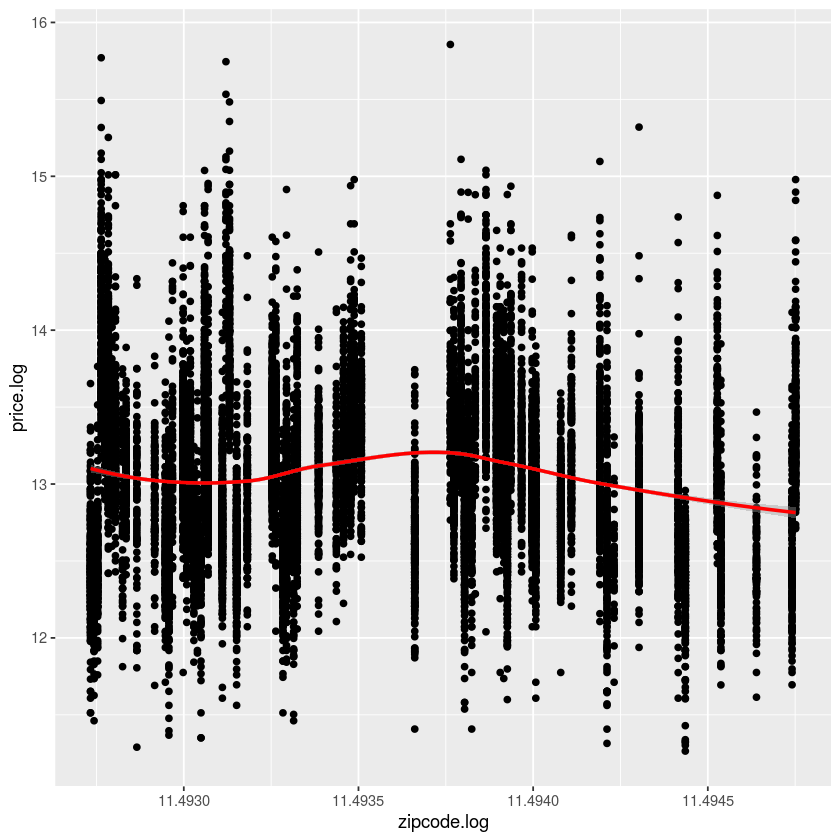

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.0986”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.28768”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.48045”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 1.0986”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.28768”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$

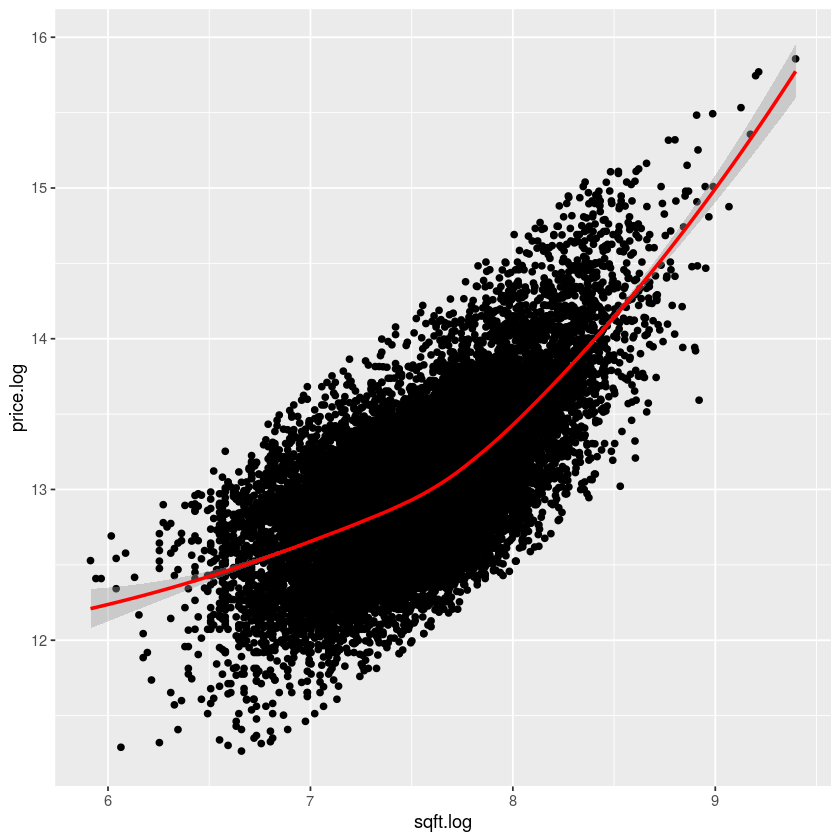

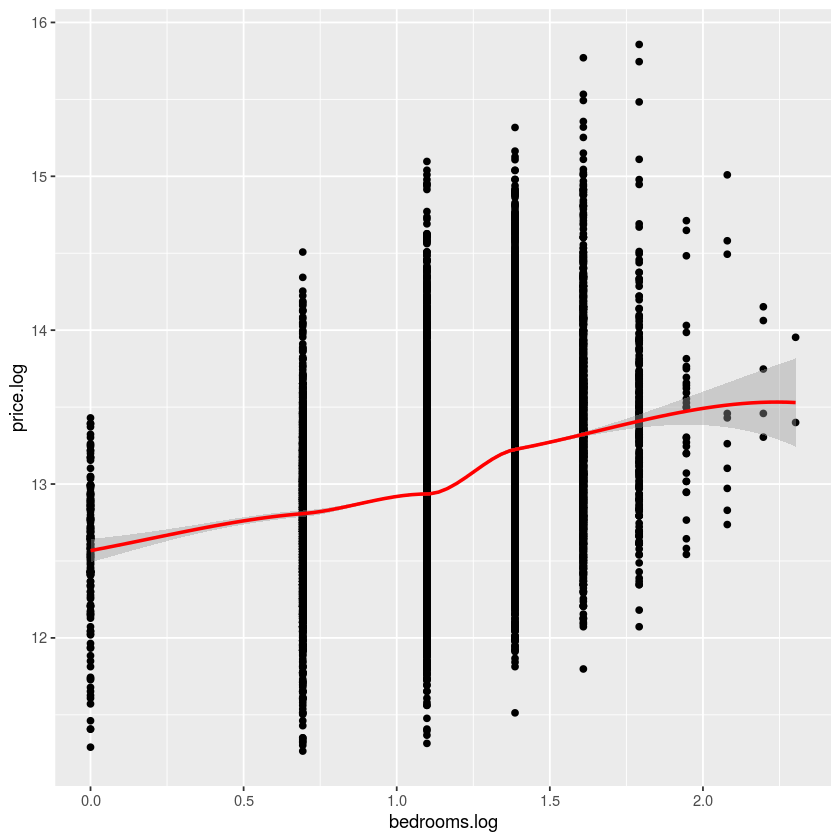

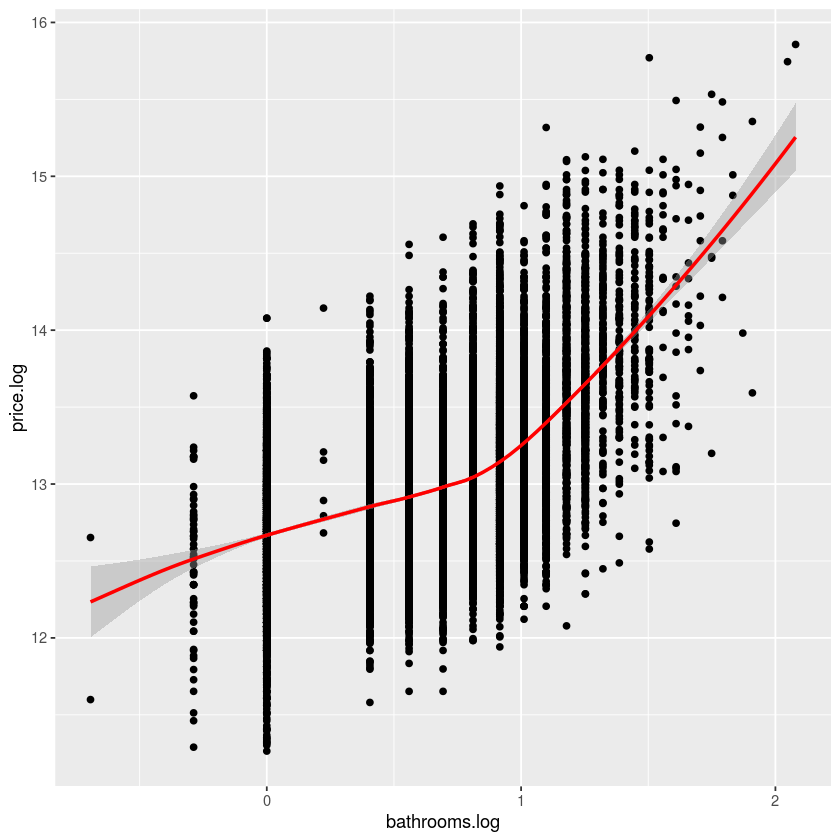

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.7321”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.26795”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.071797”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 1.7321”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.26795”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object

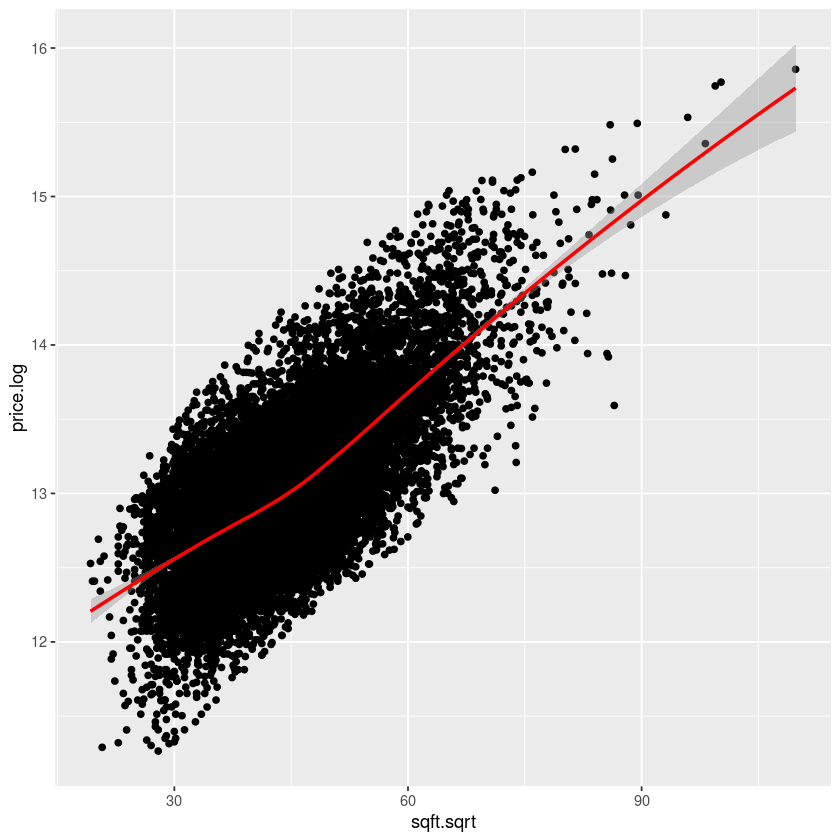

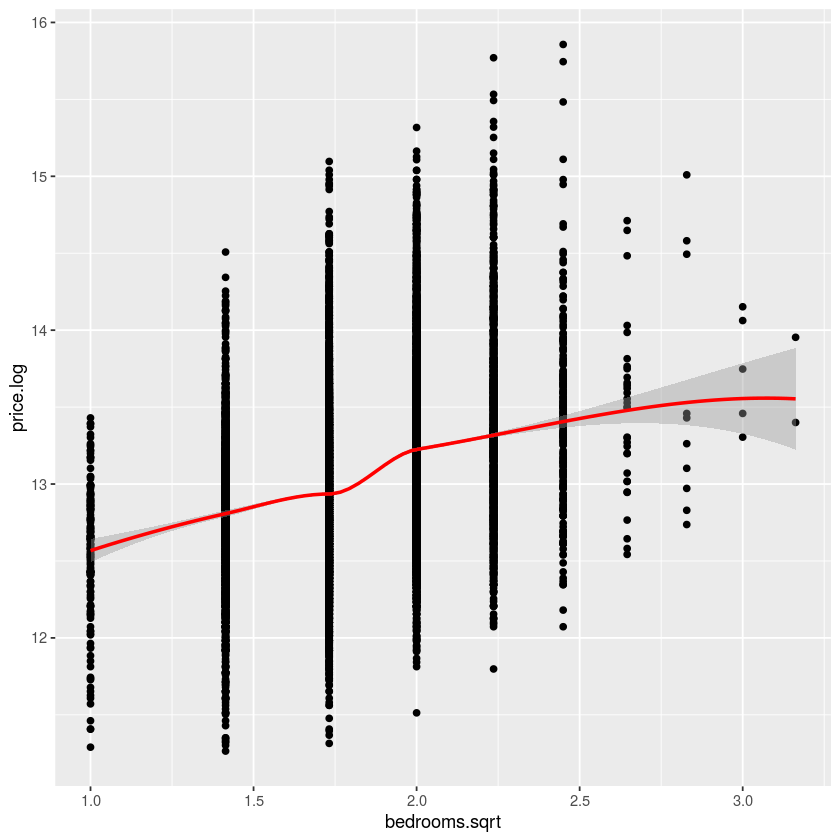

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 3”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 3”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(new

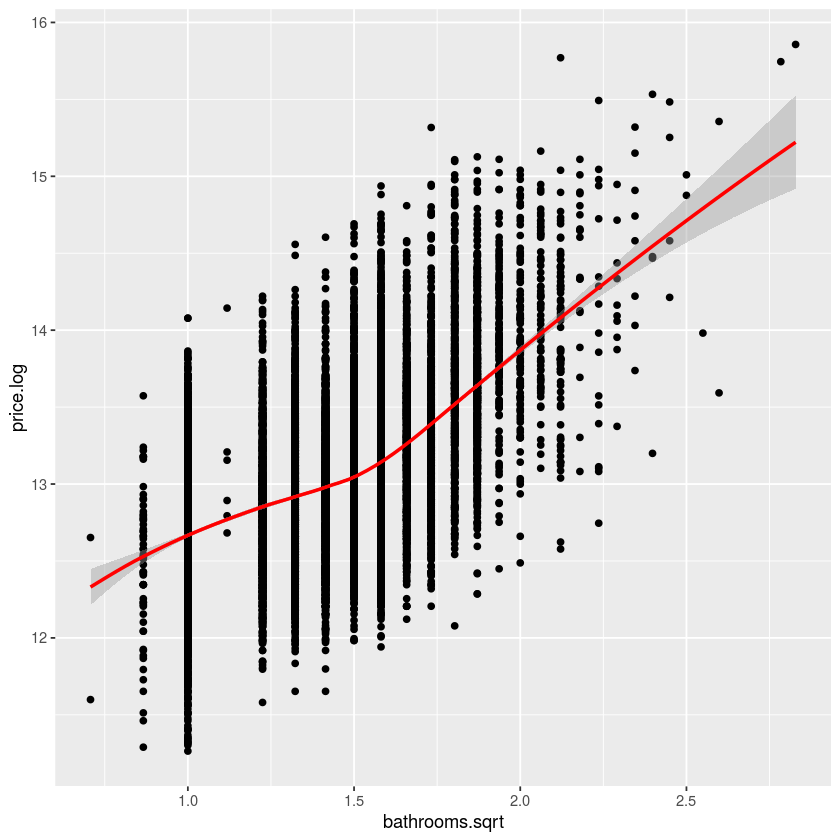

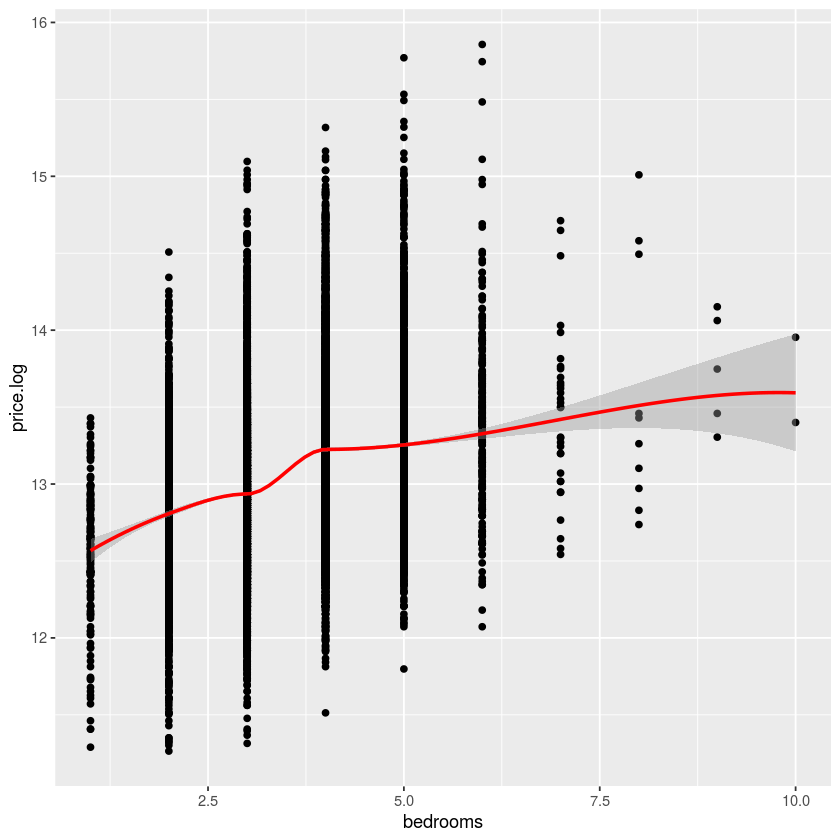

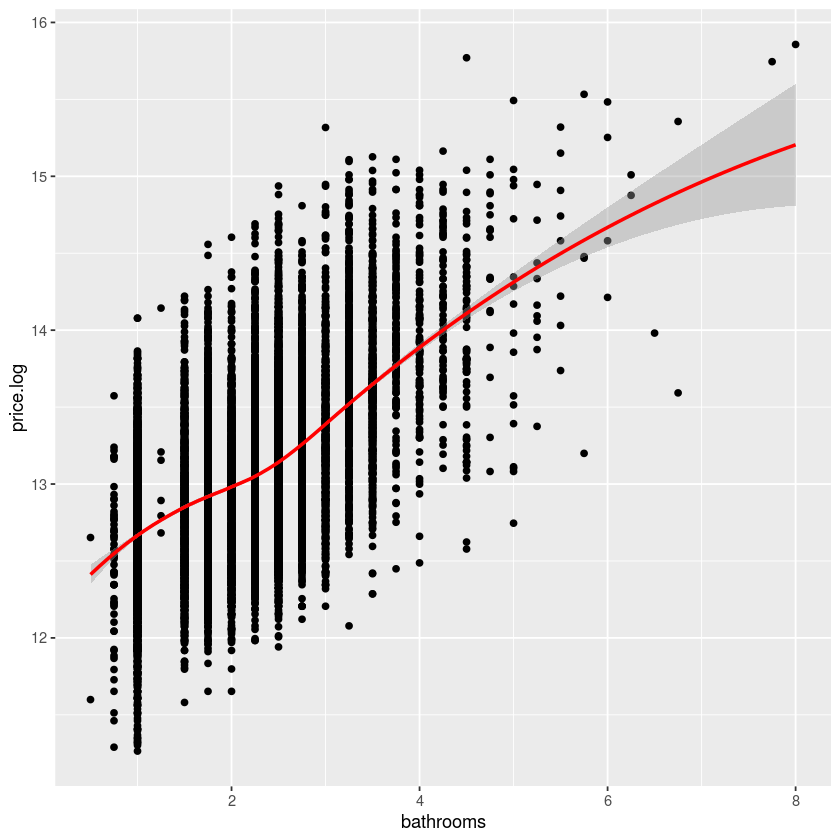

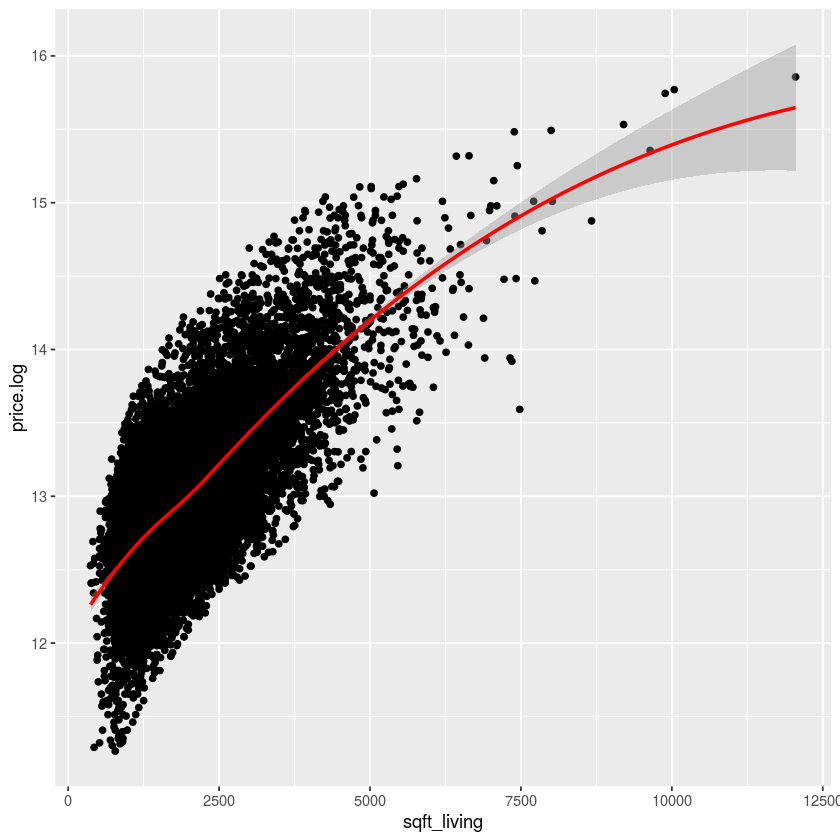

In [8]:
df.housing_train <- df_train %>% mutate(price.log = log(price),
                     bedrooms.log = log(bedrooms),
                     bathrooms.log = log(bathrooms),
                     sqft.log = log(sqft_living),
                    zipcode.log = log(zipcode),
                     price.sqrt = sqrt(price),
                      bedrooms.sqrt = sqrt(bedrooms),
                      bathrooms.sqrt = sqrt(bathrooms),
                      sqft.sqrt = sqrt(sqft_living)) %>% filter(bedrooms != 0, bathrooms !=0, bedrooms <=10)

plot.feature = function(col, df){
  p1 = ggplot(df, aes_string(x = col, y = 'price.log')) + 
    geom_point() + 
    geom_smooth(size = 1, color = 'red', method="loess")
  
  p1 %>% print()
}
cols = c('zipcode.log','sqft.log', 'bedrooms.log', 'bathrooms.log','sqft.sqrt','bedrooms.sqrt', 'bathrooms.sqrt', 
         'bedrooms', 'bathrooms',
         'sqft_living')

cols %>% walk(plot.feature, df.housing_train)

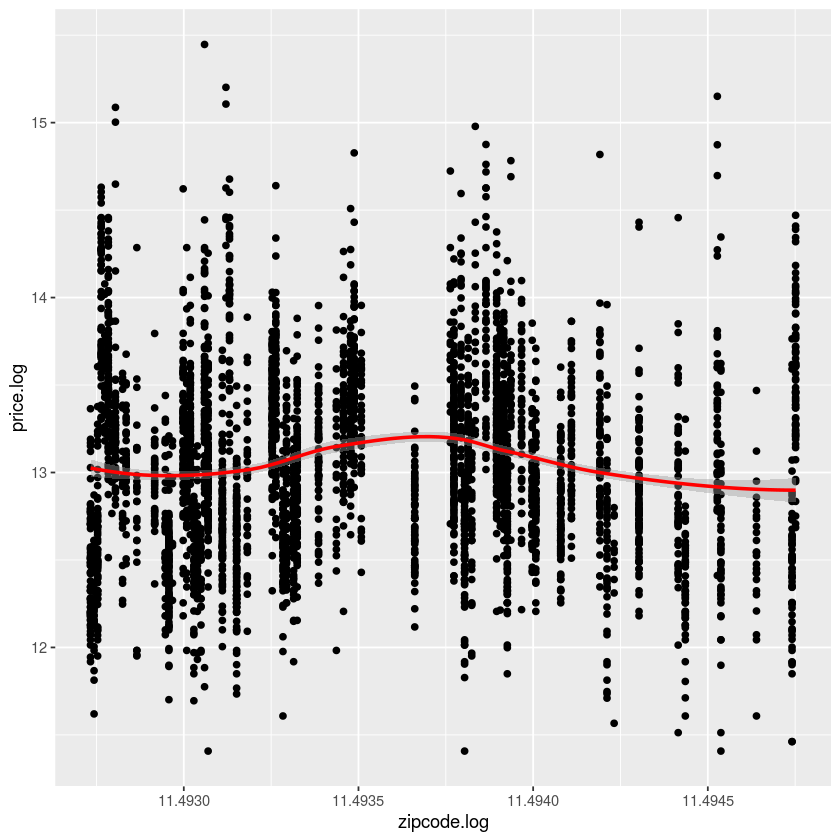

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.0986”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.28768”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.48045”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 1.0986”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.28768”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$

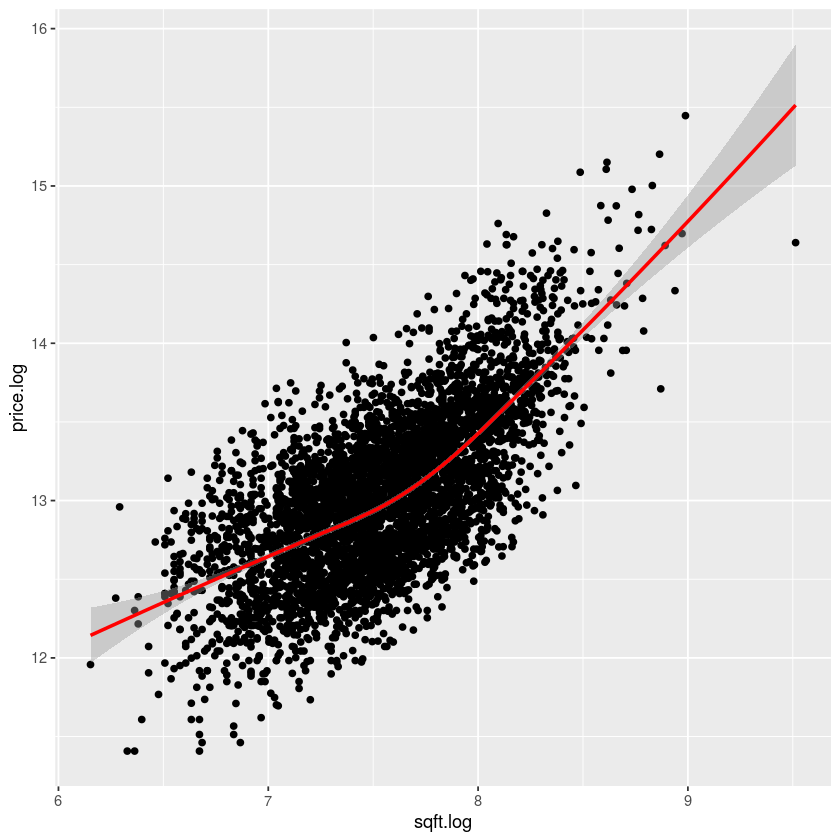

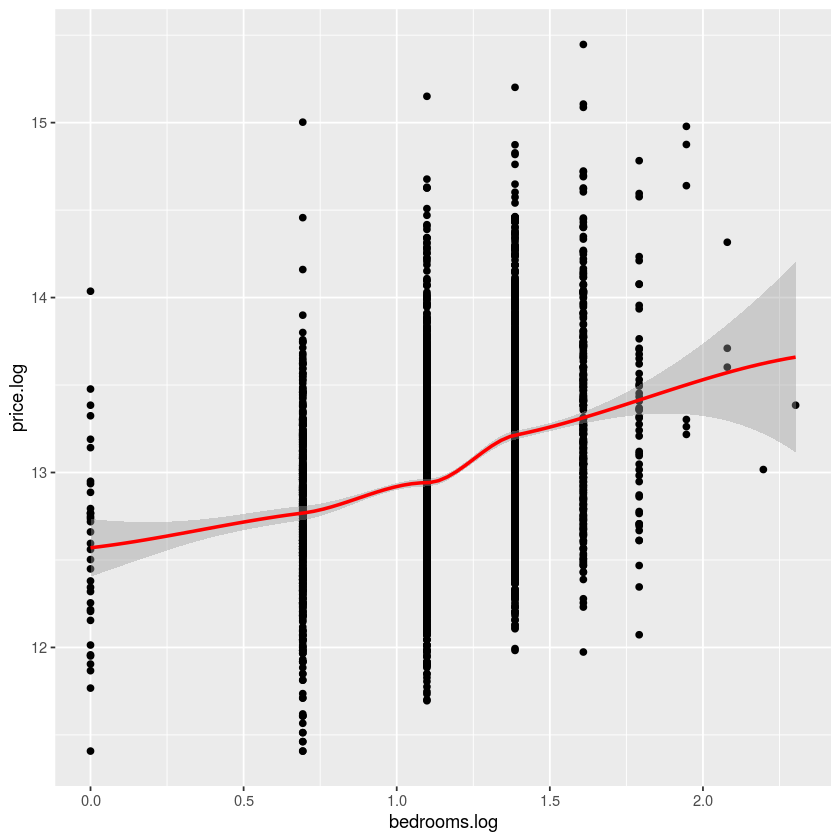

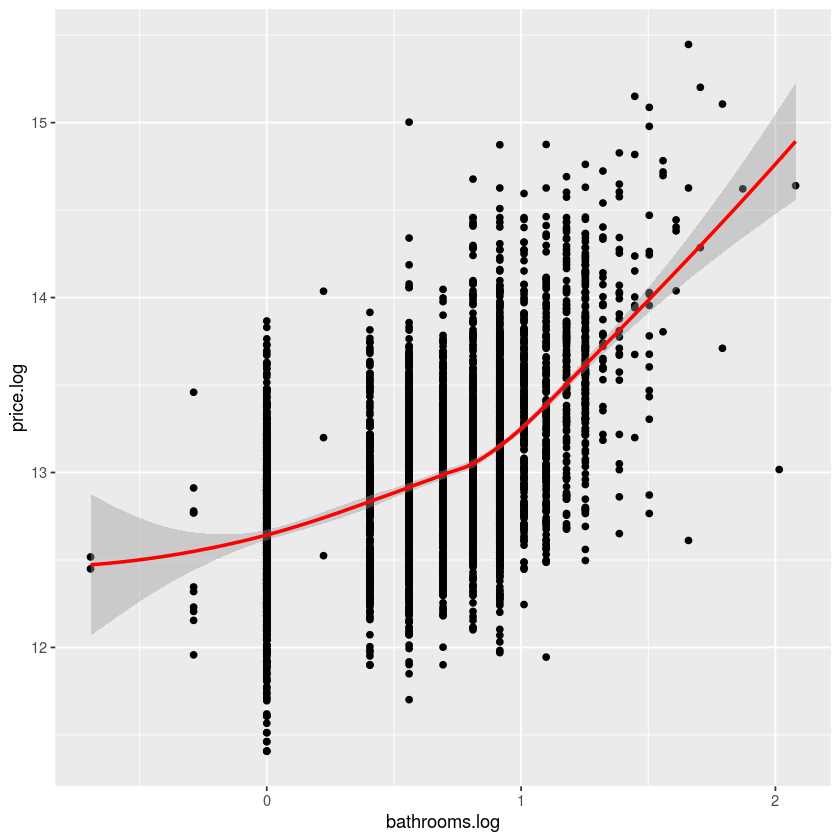

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1.7321”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.26795”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.071797”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 1.7321”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 0.26795”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object

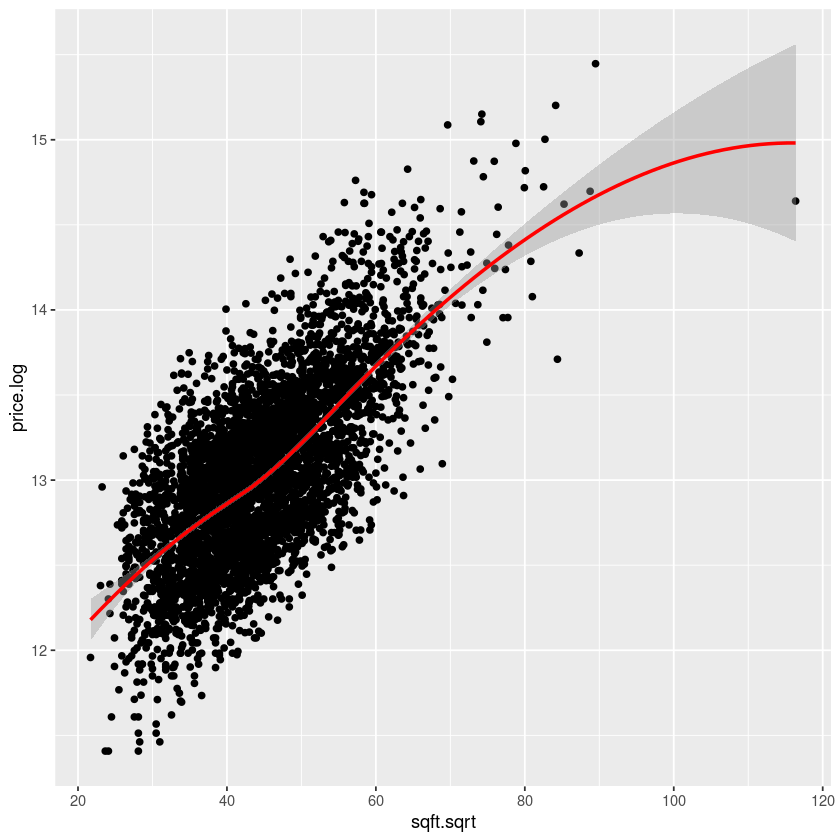

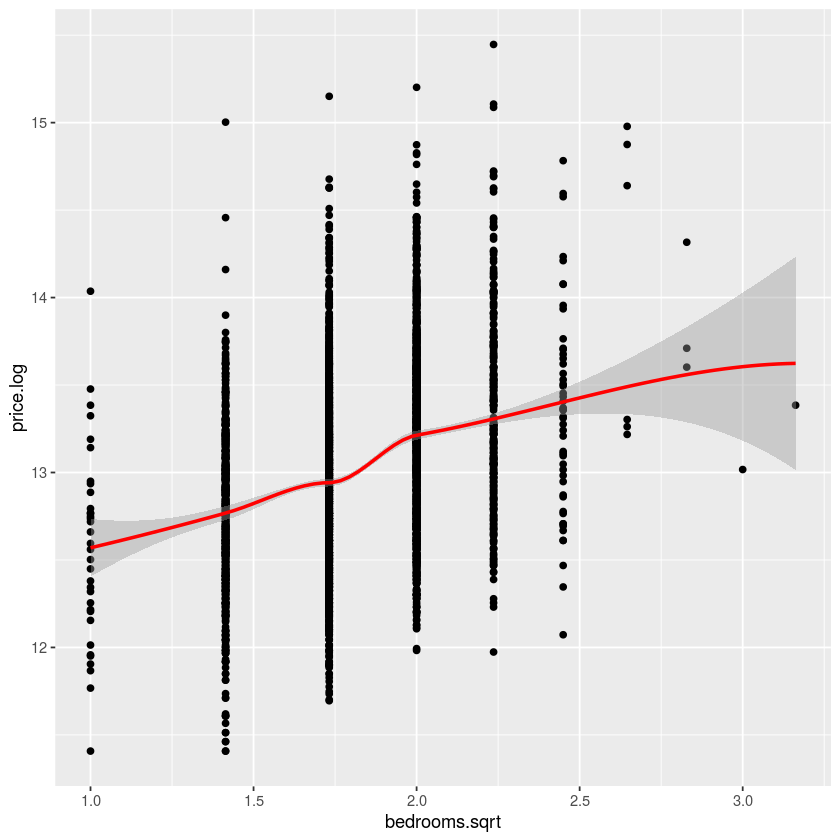

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 3”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 3”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(new

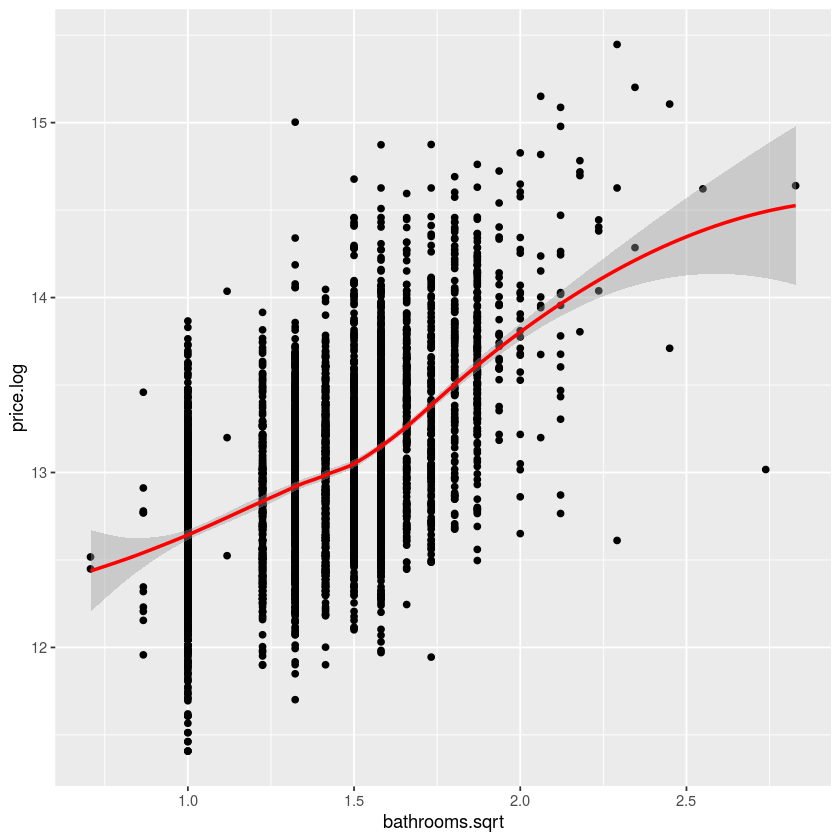

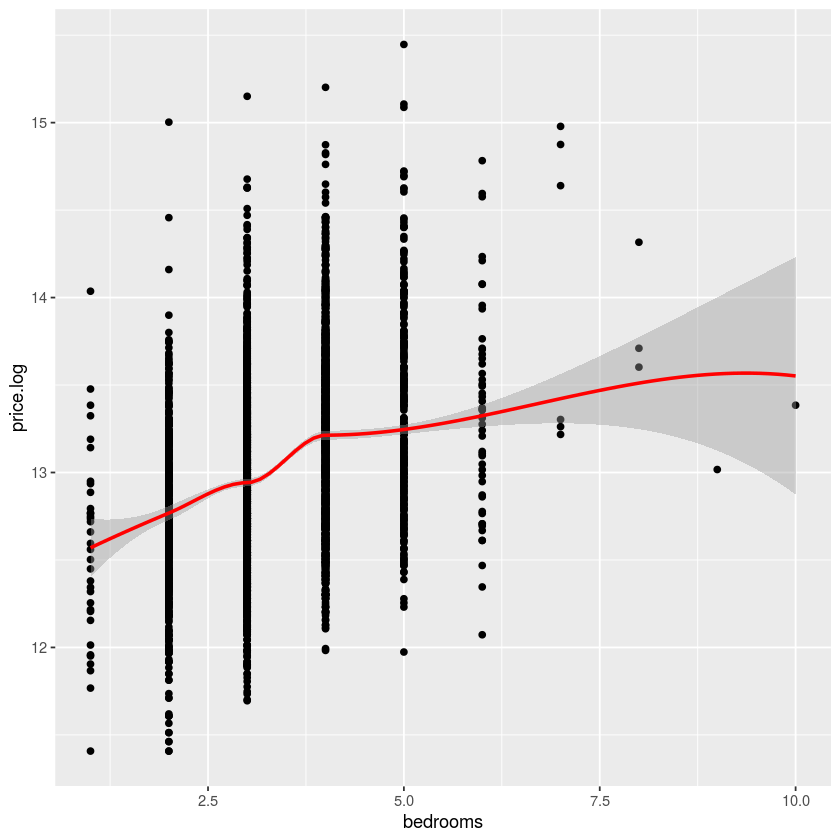

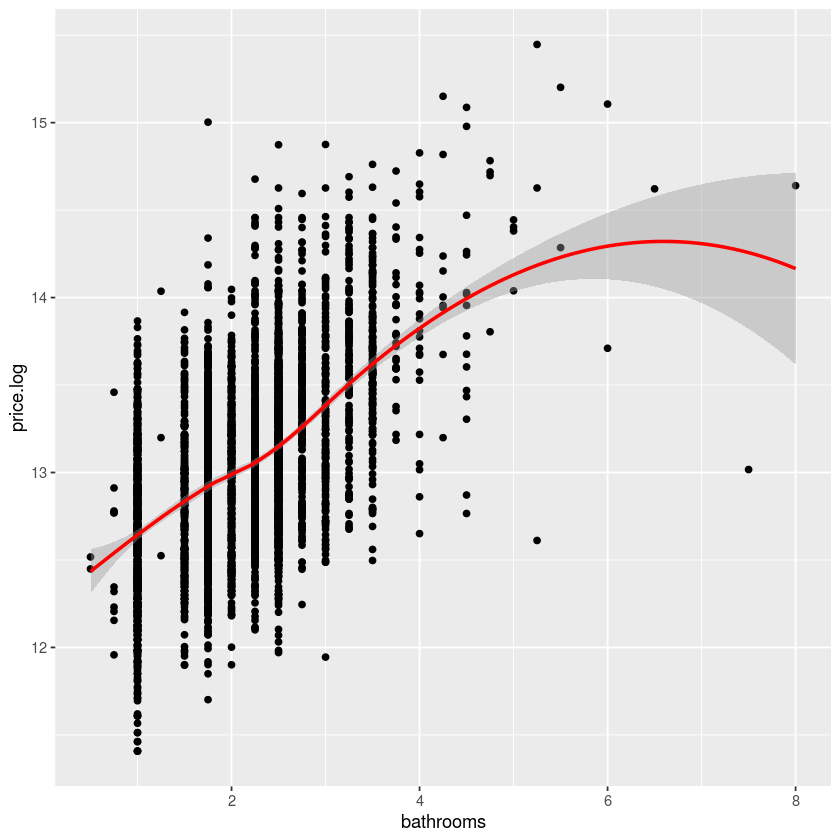

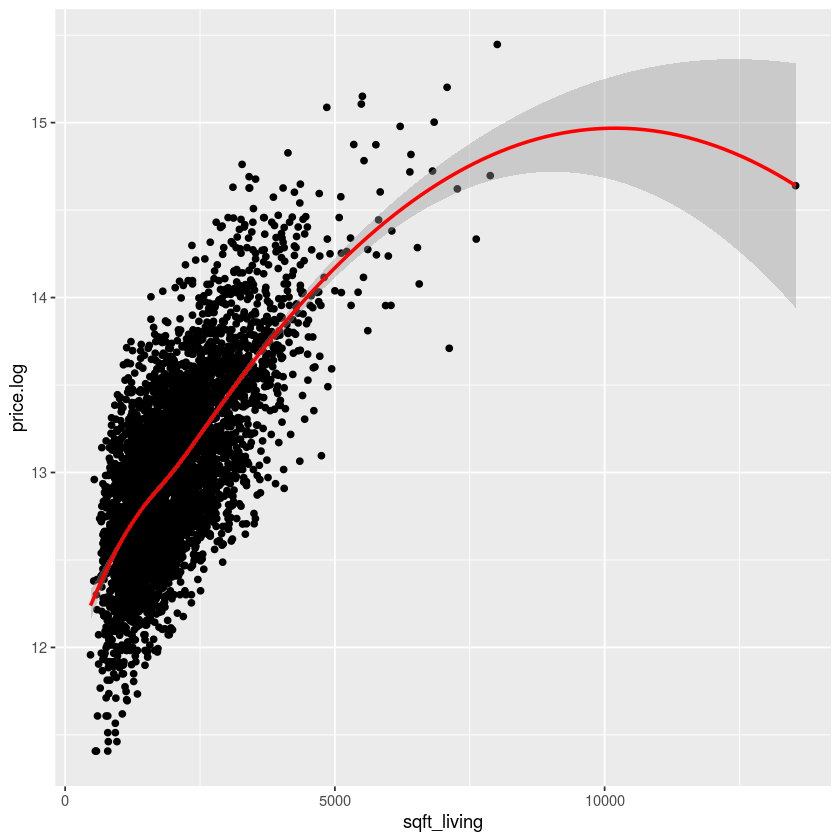

In [9]:
df.housing_test <- df_test %>% mutate(price.log = log(price),
                     bedrooms.log = log(bedrooms),
                     bathrooms.log = log(bathrooms),
                     sqft.log = log(sqft_living),
                    zipcode.log = log(zipcode),
                     price.sqrt = sqrt(price),
                      bedrooms.sqrt = sqrt(bedrooms),
                      bathrooms.sqrt = sqrt(bathrooms),
                      sqft.sqrt = sqrt(sqft_living)) %>% filter(bedrooms != 0, bathrooms !=0, bedrooms <=10)
cols = c('zipcode.log','sqft.log', 'bedrooms.log', 'bathrooms.log','sqft.sqrt','bedrooms.sqrt', 'bathrooms.sqrt', 'bedrooms', 'bathrooms',
         'sqft_living')

cols %>% walk(plot.feature, df.housing_test)

based on the results above, we belive that sqft_living, bathrooms, bathrooms.sqrt, sqft.sqrt, sqft.log fit the best of all the data above. 

# Train and test models

# Training Set 

## Model 1


In [10]:
normalize <- function(x) (x - mean(x))/sd(x)
    
df.housing_train <- df.housing_train %>% 
  mutate(sqft.log = normalize(sqft.log), 
         bathrooms.log = normalize(bathrooms.log), 
         sqft.sqrt = normalize(sqft.sqrt),
         bathrooms.sqrt = normalize(bathrooms.sqrt),
         bathrooms = normalize(bathrooms),
        sqft_living = normalize(sqft_living))  

df.housing_train %>% 
  select(sqft.log, bathrooms.log, sqft.sqrt, bathrooms.sqrt, bathrooms, sqft_living) %>% 
  glimpse() %>% 
  summary()

Observations: 17,276
Variables: 6
$ sqft.log       <dbl> 2.1142770, -0.4711911, 0.7826885, -0.2964456, 0.554393…
$ bathrooms.log  <dbl> 1.27493628, -0.69688491, 0.60584396, 0.03677394, 0.848…
$ sqft.sqrt      <dbl> 2.484690472, -0.538898916, 0.722288233, -0.382588713, …
$ bathrooms.sqrt <dbl> 1.3886446, -0.7668269, 0.5621629, -0.0602999, 0.849942…
$ bathrooms      <dbl> 1.4721645, -0.8035257, 0.4968687, -0.1533285, 0.821967…
$ sqft_living    <dbl> 2.81604838, -0.56989665, 0.62226085, -0.43924925, 0.35…


    sqft.log        bathrooms.log       sqft.sqrt       bathrooms.sqrt   
 Min.   :-3.86419   Min.   :-3.4986   Min.   :-2.6631   Min.   :-2.6971  
 1st Qu.:-0.67636   1st Qu.:-0.3038   1st Qu.:-0.7152   1st Qu.:-0.4009  
 Median : 0.01842   Median : 0.3371   Median :-0.0859   Median : 0.2596  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.68754   3rd Qu.: 0.6058   3rd Qu.: 0.6144   3rd Qu.: 0.5622  
 Max.   : 4.34943   Max.   : 3.5722   Max.   : 6.8287   Max.   : 5.2133  
   bathrooms        sqft_living     
 Min.   :-2.1039   Min.   :-1.8655  
 1st Qu.:-0.4784   1st Qu.:-0.7114  
 Median : 0.1718   Median :-0.1780  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4969   3rd Qu.: 0.5079  
 Max.   : 7.6490   Max.   :10.8509  

In [11]:
housing.mod_train <- lm(price.log ~ sqft_living + bathrooms + bathrooms.log  + sqft.log, data = df.housing_train)

housing.mod_train %>% summary()

cat('The coefficient confidence intervals')
housing.mod_train %>% confint()



Call:
lm(formula = price.log ~ sqft_living + bathrooms + bathrooms.log + 
    sqft.log, data = df.housing_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62387 -0.28744  0.01326  0.25850  1.29129 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   13.050104   0.002871 4545.841  < 2e-16 ***
sqft_living    0.284903   0.012727   22.386  < 2e-16 ***
bathrooms      0.072136   0.015814    4.562 5.11e-06 ***
bathrooms.log -0.047855   0.015651   -3.058  0.00224 ** 
sqft.log       0.064470   0.012794    5.039 4.73e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3773 on 17271 degrees of freedom
Multiple R-squared:  0.4875,	Adjusted R-squared:  0.4874 
F-statistic:  4107 on 4 and 17271 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),13.04447682,13.05573086
sqft_living,0.25995671,0.30984869
bathrooms,0.04113973,0.10313245
bathrooms.log,-0.07853332,-0.01717644
sqft.log,0.03939241,0.08954851


## Model 2

In [12]:
housing.mod2_train <- lm(price.log ~ sqft_living, data = df.housing_train)

housing.mod2_train %>% summary()

cat('The coefficient confidence intervals')
housing.mod2_train %>% confint()

df.housing2_train <- df.housing_train %>% 
  mutate(score2 = predict(housing.mod2_train, data = df.housing_train),
         resids2 = price.log - score2,
         predicted.price2 = exp(score2)) 

df.housing2_train %>% select(price,predicted.price2) %>% head(10)


Call:
lm(formula = price.log ~ sqft_living, data = df.housing_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6150 -0.2868  0.0144  0.2604  1.2745 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.050104   0.002876  4537.0   <2e-16 ***
sqft_living  0.367175   0.002876   127.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3781 on 17274 degrees of freedom
Multiple R-squared:  0.4854,	Adjusted R-squared:  0.4854 
F-statistic: 1.629e+04 on 1 and 17274 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),13.0444659,13.0557418
sqft_living,0.3615368,0.3728131


price,predicted.price2
<dbl>,<dbl>
1578000,1308100.1
335000,377321.2
409950,584541.1
305000,395862.6
365000,530005.6
220000,330688.9
1095000,1037401.0
488000,348328.5
294000,457134.9


# Testing Set

## Model 1


In [13]:
df.housing_test <- df.housing_test %>% 
  mutate(sqft.log = normalize(sqft.log), 
         bathrooms.log = normalize(bathrooms.log), 
         sqft.sqrt = normalize(sqft.sqrt),
         bathrooms.sqrt = normalize(bathrooms.sqrt),
         bathrooms = normalize(bathrooms),
        sqft_living = normalize(sqft_living))  

df.housing_test %>% 
  select(sqft.log, bathrooms.log, sqft.sqrt, bathrooms.sqrt, bathrooms, sqft_living) %>% 
  glimpse() %>% 
  summary()

Observations: 4,319
Variables: 6
$ sqft.log       <dbl> -0.22912318, -0.10215307, -1.34013283, 0.61086745, -0.…
$ bathrooms.log  <dbl> 0.3497600, 0.0507982, -0.6794083, 0.3497600, 0.0507982…
$ sqft.sqrt      <dbl> -0.320843075, -0.201924893, -1.235343855, 0.528836730,…
$ bathrooms.sqrt <dbl> 0.27319933, -0.04620555, -0.75164601, 0.27319933, -0.0…
$ bathrooms      <dbl> 0.1854682, -0.1396280, -0.7898204, 0.1854682, -0.13962…
$ sqft_living    <dbl> -0.38478964, -0.28114517, -1.08848110, 0.41709132, -0.…


    sqft.log         bathrooms.log       sqft.sqrt       bathrooms.sqrt   
 Min.   :-3.277596   Min.   :-3.4680   Min.   :-2.3947   Min.   :-2.6789  
 1st Qu.:-0.690299   1st Qu.:-0.6794   1st Qu.:-0.7268   1st Qu.:-0.7516  
 Median :-0.000297   Median : 0.3498   Median :-0.1042   Median : 0.2732  
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.705082   3rd Qu.: 0.6172   3rd Qu.: 0.6339   3rd Qu.: 0.5753  
 Max.   : 4.636983   Max.   : 3.5695   Max.   : 7.5559   Max.   : 5.2193  
   bathrooms        sqft_living     
 Min.   :-2.0902   Min.   :-1.7431  
 1st Qu.:-0.7898   1st Qu.:-0.7175  
 Median : 0.1855   Median :-0.1939  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5106   3rd Qu.: 0.5262  
 Max.   : 7.6627   Max.   :12.5162  

In [14]:
housing.mod_test <- lm(price.log ~ sqft_living + bathrooms + bathrooms.log  + sqft.log, data = df.housing_test)

housing.mod_test %>% summary()

cat('The coefficient confidence intervals')
housing.mod_test %>% confint()

df.housing_test <- df.housing_test %>% 
  mutate(score = predict(housing.mod_test, data = df.housing_test),
         resids = price.log - score,
         predicted.price = exp(score)) 

df.housing_test %>% select(price,predicted.price) %>% head(10)





Call:
lm(formula = price.log ~ sqft_living + bathrooms + bathrooms.log + 
    sqft.log, data = df.housing_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08460 -0.28363  0.01722  0.25607  1.21046 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   13.040194   0.005748 2268.798  < 2e-16 ***
sqft_living    0.227719   0.023927    9.517  < 2e-16 ***
bathrooms      0.046539   0.030098    1.546    0.122    
bathrooms.log -0.017718   0.029993   -0.591    0.555    
sqft.log       0.116572   0.024320    4.793  1.7e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3777 on 4314 degrees of freedom
Multiple R-squared:  0.4811,	Adjusted R-squared:  0.4806 
F-statistic: 999.8 on 4 and 4314 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),13.02892615,13.05146274
sqft_living,0.18081070,0.27462804
bathrooms,-0.01246821,0.10554577
bathrooms.log,-0.07651902,0.04108295
sqft.log,0.06889242,0.16425135


price,predicted.price
<dbl>,<dbl>
257500,411801.0
530000,423736.0
252700,299954.1
329000,545151.3
233000,406939.2
280000,318182.1
687500,512093.2
696000,521570.1
625000,575014.4


## Model 2

In [15]:
housing.mod2_test <- lm(price.log ~ sqft_living, data = df.housing_test)

housing.mod2_test %>% summary()

cat('The coefficient confidence intervals')
housing.mod2_test %>% confint()

df.housing2_test <- df.housing_test %>% 
  mutate(score2 = predict(housing.mod2_test, data = df.housing_test),
         resids2 = price.log - score2,
         predicted.price2 = exp(score2)) 

df.housing2_test %>% select(price,predicted.price2) %>% head(10)


Call:
lm(formula = price.log ~ sqft_living, data = df.housing_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91979 -0.28174  0.01701  0.25883  1.24360 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.040194   0.005781 2255.58   <2e-16 ***
sqft_living  0.361074   0.005782   62.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3799 on 4317 degrees of freedom
Multiple R-squared:  0.4746,	Adjusted R-squared:  0.4745 
F-statistic:  3900 on 1 and 4317 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),13.0288601,13.0515288
sqft_living,0.3497381,0.3724095


price,predicted.price2
<dbl>,<dbl>
257500,400815.7
530000,416099.7
252700,310883.2
329000,535413.8
233000,400027.0
280000,325932.0
687500,510692.9
696000,504693.1
625000,561331.4


# Model Performance Comparison

# Placeholder

In [16]:
df.housing_test <- df.housing_test %>% 
  mutate(score = predict(housing.mod_test, data = df.housing_test),
         resids = price.log - score, 
         predicted.price = exp(score)) 

df.housing_test %>% select(price,predicted.price) %>% head()

price,predicted.price
<dbl>,<dbl>
257500,411801.0
530000,423736.0
252700,299954.1
329000,545151.3
233000,406939.2
280000,318182.1


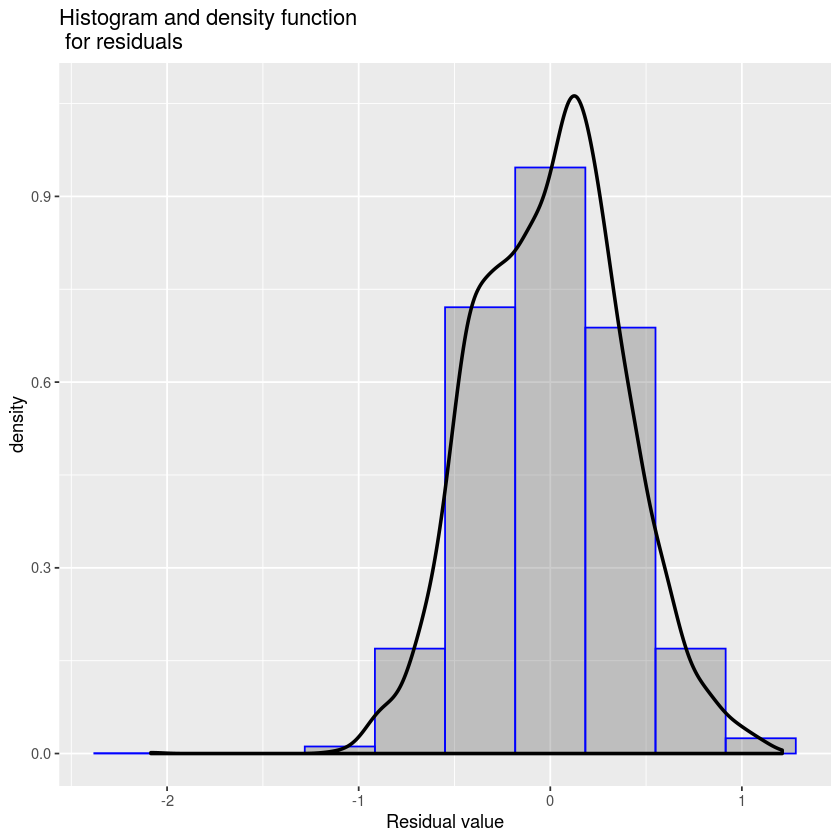

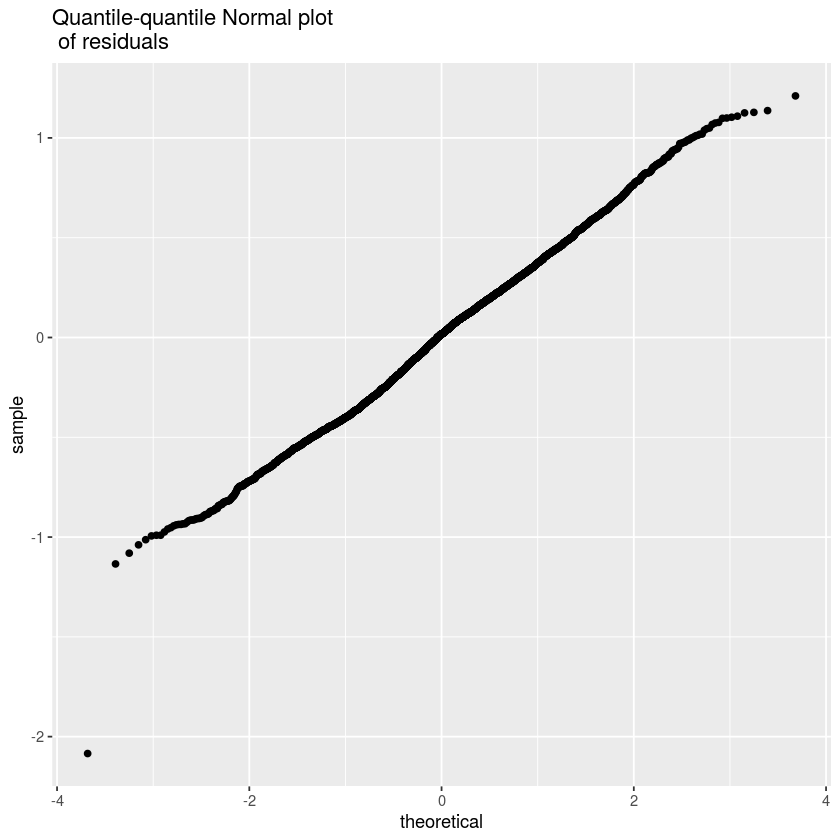

In [17]:
plot.resids <- function(df) {
  p1 <- df %>% 
    ggplot(aes(resids, ..density..)) + 
    geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
    geom_density(size = 1) +
    labs(title="Histogram and density function \n for residuals", x="Residual value")
 
  p2 <- df %>% 
    ggplot(aes(sample = resids)) + 
    geom_qq() + 
    labs(title="Quantile-quantile Normal plot \n of residuals")
  
  # Print the plots
  p1 %>% print()
  p2 %>% print()
}

df.housing_test %>% plot.resids()

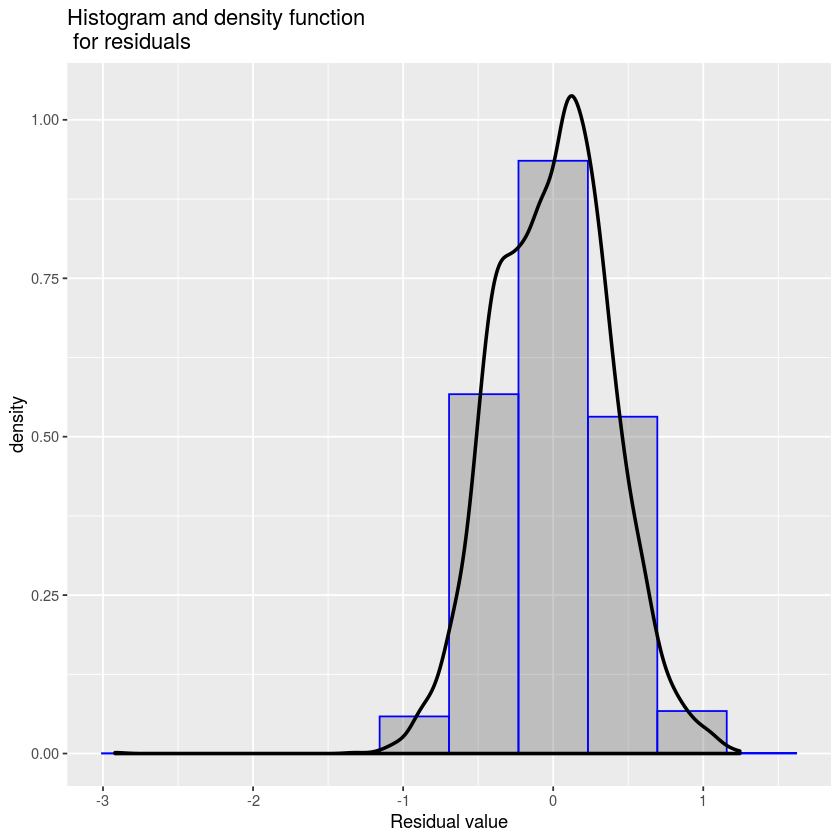

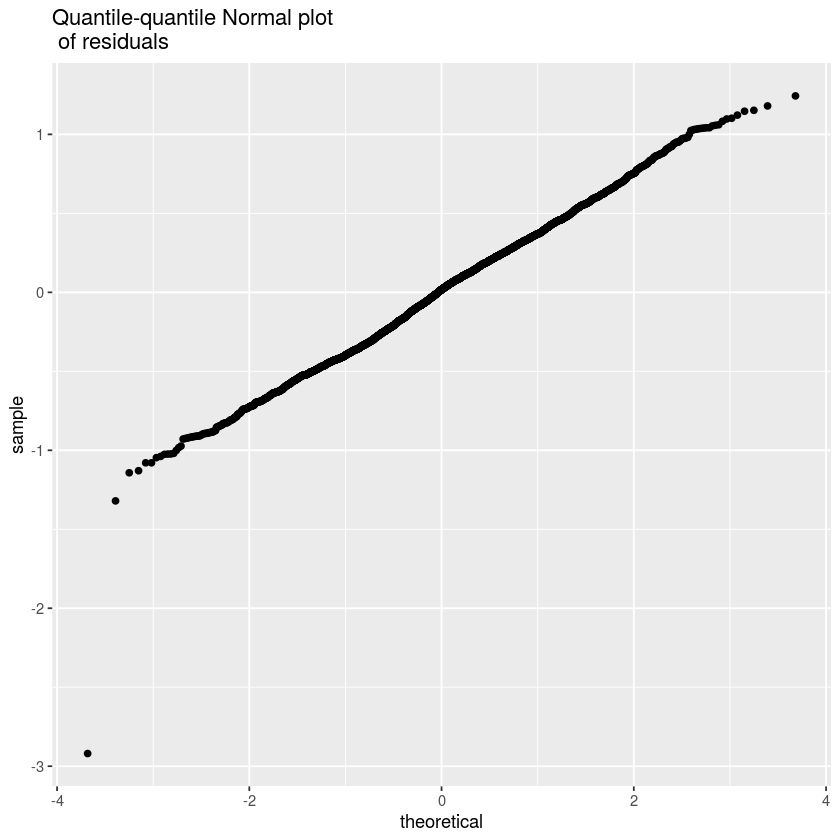

In [18]:
plot.resids2 <- function(df) {
  p3 <- df %>% 
    ggplot(aes(resids2, ..density..)) + 
    geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
    geom_density(size = 1) +
    labs(title="Histogram and density function \n for residuals", x="Residual value")
 
  p4 <- df %>% 
    ggplot(aes(sample = resids2)) + 
    geom_qq() + 
    labs(title="Quantile-quantile Normal plot \n of residuals")
  
  # Print the plots
  p3 %>% print()
  p4 %>% print()
}

df.housing2_test %>% plot.resids2()

# Analysis and Conclusions
Our regressions tell us a lot about the KC housing data set. The first thing we needed to do was to explore the data and see which factors affect the price of the house the most. We could see very easily that a factor such as zip code didn't really affect the price. This could be for a multitude of reasons, but further down we can see that factors such as Square Feet of a house, bathrooms and bedrooms do have a linear relationship with the price. Now that we know which factors relate to the price, we need to do our regression. We did one regression where we looked at one factor, square feet. Testing the accuracy of this model we can see that we are clearly missing some other factors. Square footage gets us part of the way there, but there's too many other factors. That brings us to our multivariate model. We included square feet, bedrooms, bathrooms and logs/square roots based on linear correlation from the charts above. This model was somewhat better still isn't that accurate. Our takeaway is that we need to explore more factors in the data beyond the factors we used. We are missing something but will need to investigate to determine appropriate steps to improve the model. However, we believe that this model provides a good basis to begin with. 